# Fraud Transaction Detection

Name : Priyanka Pawar

Objective: 1. Reduce the dimensionality of the data. 
           2.Build a model that can identify potentially fraudulent transactions.
           I have applied, Principal component Analysis for dimension reduction and Discriminant analysis for model building and predictions

#Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve



In [2]:
Data=pd.read_csv("C:/Priyanka/TechnoHacks Data Science Internship/creditcard.csv")

In [3]:
Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis

#Checking Dimensions of the dataset

In [4]:
Data.shape

(284807, 31)

Comment: The Dataset contains 284807 observations with 31 variables

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#Checking for Missing Values

In [6]:
Data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Comment: There are no missing observations in the dataset.

In [7]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


# Univariate analysis

In [8]:
# Taagret variable distribution

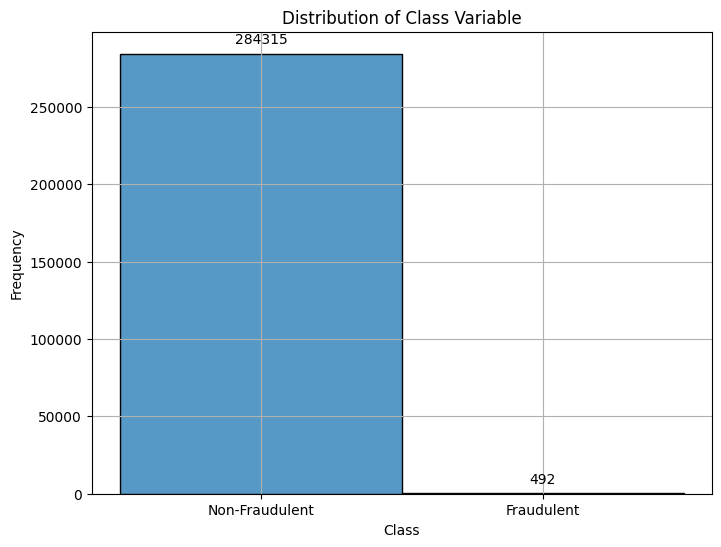

In [9]:
# Create the histogram
plt.figure(figsize=(8, 6))
ax = sns.histplot(Data['Class'], bins=2, kde=False, discrete=True)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Customize the plot
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Class Variable')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.grid(True)

# Show the plot
plt.show()

Comment : From the above , we can see that, the dataset contains 284315 observations that are non fraudulent and 492 fraudulent.

In [10]:
# List of numerical columns for univariate analysis
numerical_cols = Data.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


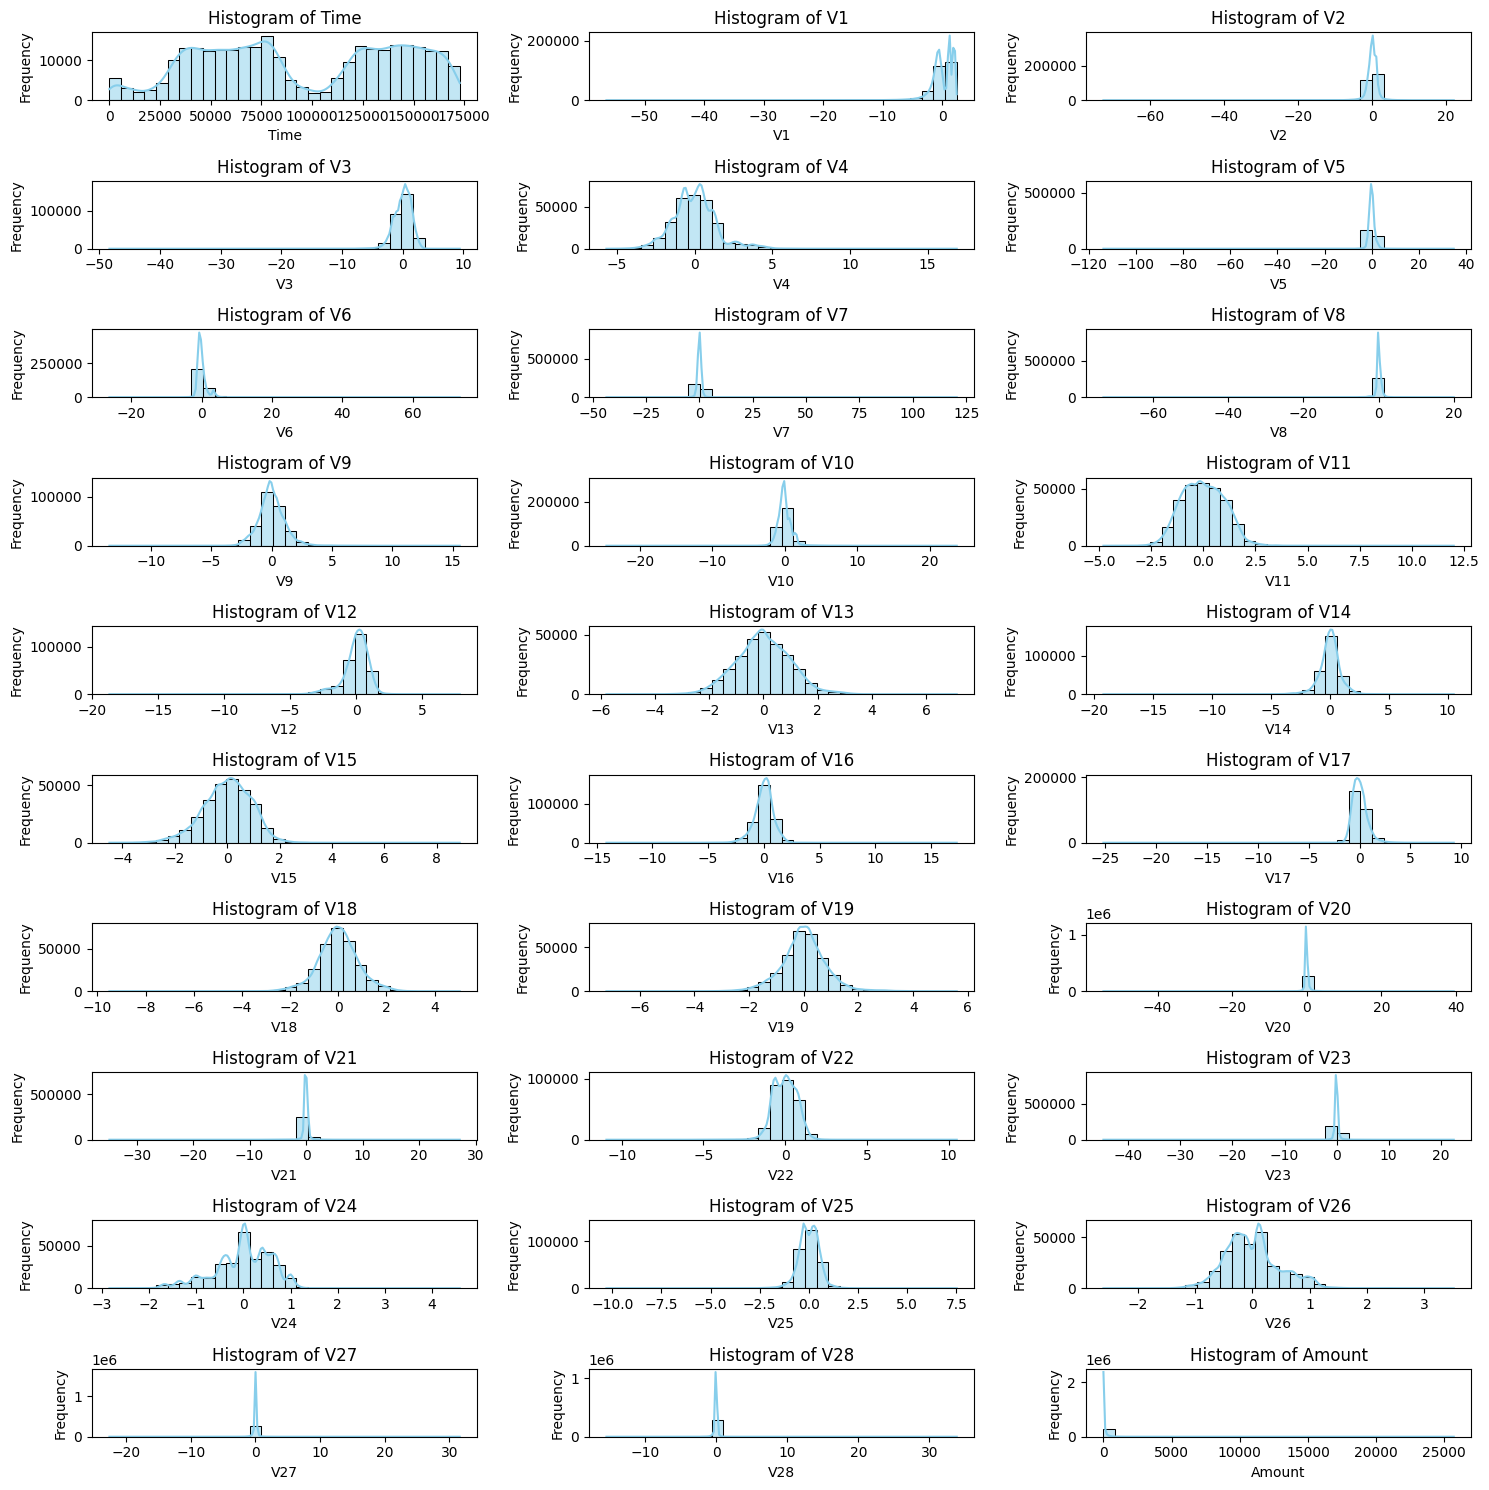

In [11]:
# List of numerical columns to plot
numerical_cols = Data.columns[:-1]  # Assuming the last column is 'Class'

# Number of rows and columns for the grid
n_cols = 3  # Number of columns in the grid
n_rows = int(np.ceil(len(numerical_cols) / n_cols))  # Number of rows in the grid

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

# Plot histograms for each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(Data[col], kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

#Boxplot

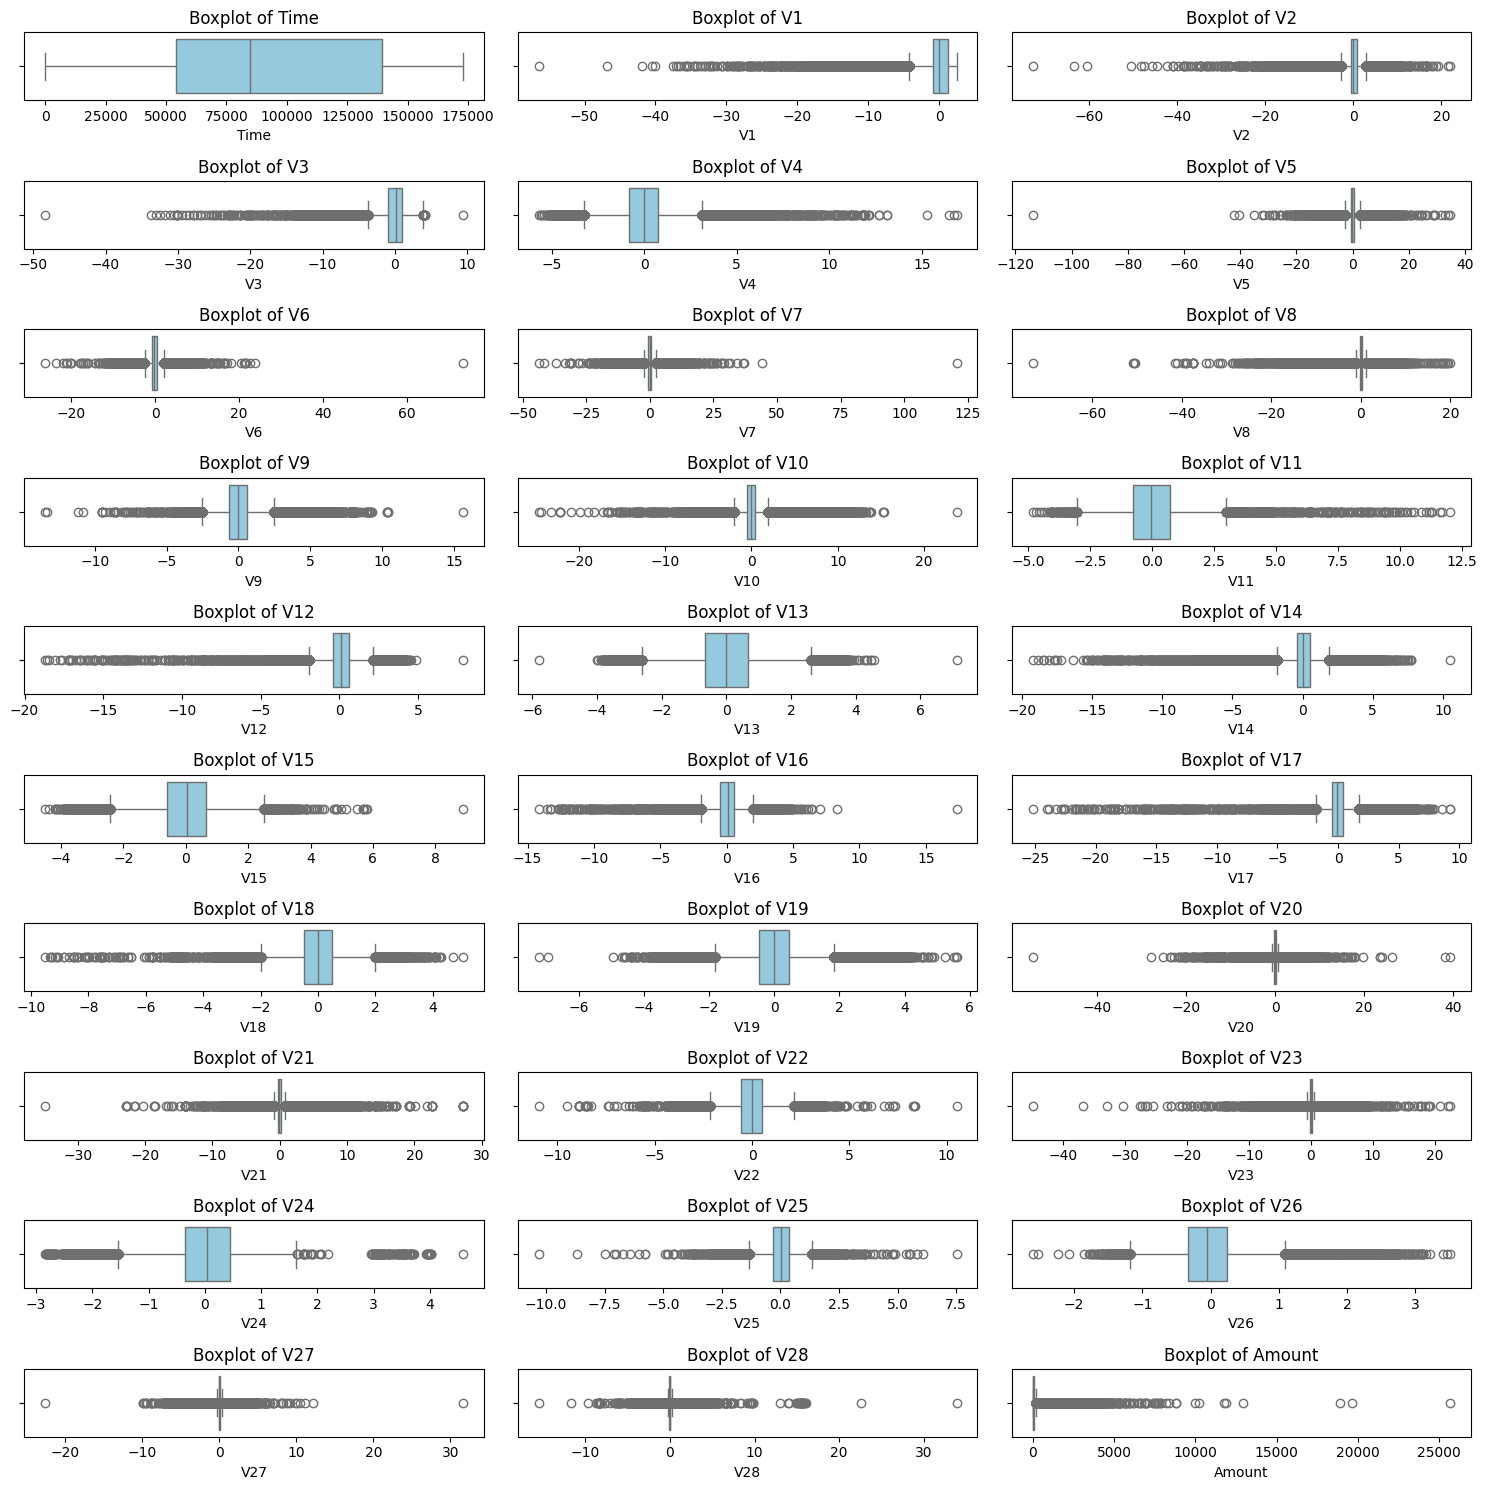

In [12]:
# Number of rows and columns for the grid
n_cols = 3  # Number of columns in the grid
n_rows = int(np.ceil(len(numerical_cols) / n_cols))  # Number of rows in the grid

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

# Plot boxplots for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=Data[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

# Bivariate Analysis

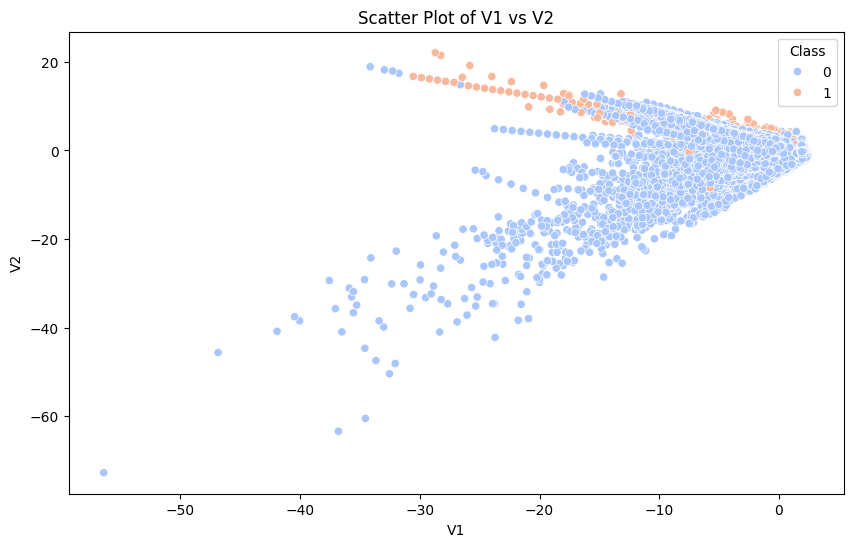

In [13]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data, x='V1', y='V2', hue='Class', palette='coolwarm')
plt.title('Scatter Plot of V1 vs V2')
plt.show()

# INSIGHTS

# Objectives

# 1. Reduce the dimensionality of the data.

In [14]:
# Separating the  features and target variable
X = Data.drop(['Class'], axis=1)
y = Data['Class']


In [15]:
# Standardizing the features(independent variables)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Applying PCA .
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [17]:
# Selecting the number of principal components that explains 95% of the variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)          

In [18]:
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
0,0.416630,-2.532664,0.615758,0.434305,-0.202052,0.503704,0.207345,-0.372804,0.444146,0.354984,...,0.408583,0.466061,0.733560,-0.707707,0.214207,0.478082,-0.777172,0.441819,1.221133,0.329165
1,-0.393453,-2.077326,0.600298,0.071324,-0.483239,-0.423898,0.400443,-0.589043,0.036856,0.519000,...,0.145511,0.057282,-0.684427,0.202588,-0.239136,-0.600761,0.576989,-0.495292,-0.259381,-0.212173
2,1.868525,-2.533497,-0.071945,1.494092,1.172747,1.186620,-0.613634,-2.119968,0.287948,1.092398,...,0.559479,-2.143424,1.615213,-0.596508,-1.244672,-1.378491,-2.523609,0.194882,1.190156,-0.136572
3,0.315744,-1.783506,-0.175553,2.516096,1.071696,-0.758788,-0.945653,-0.392858,0.425380,-0.164391,...,0.406661,-0.919148,-0.161968,0.314896,-0.617191,-0.735545,-0.672116,-1.424208,-1.013742,0.612713
4,-0.004379,-1.488415,-0.445403,0.168959,-0.288938,0.575042,-0.099431,0.576535,0.057766,0.137390,...,0.346252,0.538087,1.458182,0.180346,-0.197292,0.058801,0.593062,0.672125,1.632410,-0.233944


In [19]:
# Print the number of components
print(f"Number of components explaining 95% variance: {n_components}")


Number of components explaining 95% variance: 27


In [20]:
# Print explained variance ratio for each component
print("Explained variance ratio of each component:")
print(pca.explained_variance_ratio_)

Explained variance ratio of each component:
[0.06527521 0.05612313 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333]


Comment: The first two components contribute the most variance.

In [21]:
# Print cumulative explained variance
print("Cumulative explained variance:")
print(np.cumsum(pca.explained_variance_ratio_))

Cumulative explained variance:
[0.06527521 0.12139835 0.15473168 0.18806501 0.22139835 0.25473168
 0.28806501 0.32139835 0.35473168 0.38806501 0.42139835 0.45473168
 0.48806501 0.52139835 0.55473168 0.58806501 0.62139835 0.65473168
 0.68806501 0.72139835 0.75473168 0.78806501 0.82139835 0.85473168
 0.88806501 0.92139835 0.95473168]


Comment: The cumulative explained variance shows, the proportion of variance in the dataset explained by each principal component. 92.14% of the variance is explained by including the 25th component.

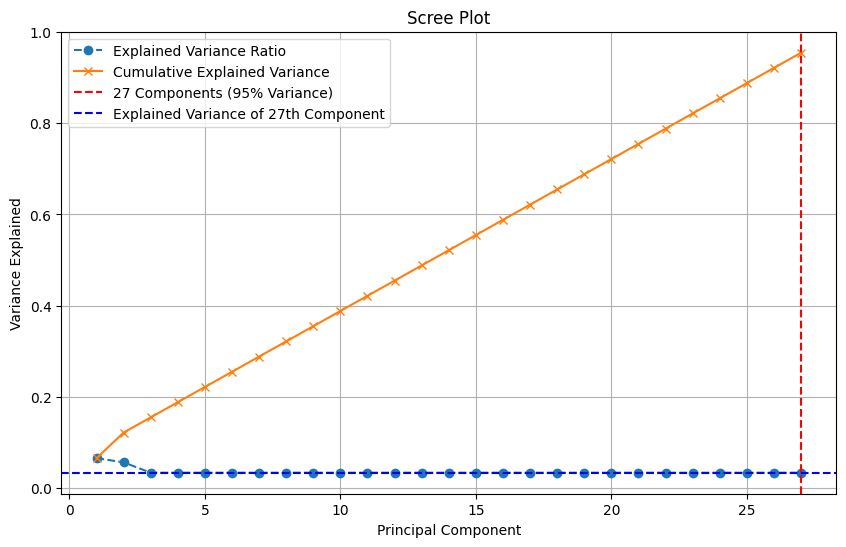

In [22]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Explained Variance Ratio')
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='x', linestyle='-', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.axvline(x=27, color='r', linestyle='--', label='27 Components (95% Variance)')
plt.axhline(y=explained_variance_ratio[26], color='b', linestyle='--', label='Explained Variance of 27th Component')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Eigen values
cov_matrix = np.cov(Data.T)

# Calculate the eigenvalues
eigen_values, _ = np.linalg.eig(cov_matrix)

print("Eigenvalues:", eigen_values)

Eigenvalues: [2.25512401e+09 6.25548602e+04 3.70420903e+00 2.40540173e+00
 2.00457779e+00 1.87909718e+00 1.80009813e+00 1.60129832e+00
 1.43038683e+00 8.24192651e-04 1.13275159e-01 1.06014657e-01
 1.65644688e-01 2.30035364e-01 2.44926527e-01 1.21169994e+00
 1.19480193e+00 3.66692647e-01 4.02354051e-01 5.02139502e-01
 5.43670588e-01 1.01300757e+00 9.92167774e-01 9.54823342e-01
 9.02713060e-01 6.59375831e-01 6.73811407e-01 7.15544976e-01
 7.76394402e-01 7.66978539e-01 8.36384548e-01]


we know that,according to the theory, only principal components with eigenvalues greater than or equal to 1 are retained.Therefore, 12 principal components are reatined from above.

# 2.Build a model that can identify potentially fraudulent transactions.

In [24]:
# Splitting the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

#Assumptions

In [34]:
#Homogeneity of variance-covariance (Box's M test)

# Ho: The null hypothesis is that the variance-covariance matrices are equal across groups v/s H1: not Ho

from statsmodels.multivariate.manova import MANOVA

manova = MANOVA.from_formula('V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + \
                              V11 + V12 + V13 + V14 + V15 + V16 + V17 + V18 + \
                              V19 + V20 + V21 + V22 + V23 + V24 + V25 + V26 + \
                              V27 + V28 + Amount ~ Class', data=Data)
print(manova.mv_test())

                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept        Value   Num DF    Den DF    F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda 0.3986 29.0000 284777.0000 14816.3201 0.0000
         Pillai's trace 0.6014 29.0000 284777.0000 14816.3201 0.0000
 Hotelling-Lawley trace 1.5088 29.0000 284777.0000 14816.3201 0.0000
    Roy's greatest root 1.5088 29.0000 284777.0000 14816.3201 0.0000
--------------------------------------------------------------------
                                                                    
--------------------------------------------------------------------
         Class          Value   Num DF    Den DF    F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda 0.4784 29.0000 284777.0000 10707

Comment: P-value is less, we reject H0 and conclude that, there are significant differences in the variance-covariance matrices across the groups being compared

In [25]:
# Apply Linear Discriminant Analysis
lda = LDA()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [26]:
# Make predictions
y_pred = lda.predict(X_test)
y_prob = lda.predict_proba(X_test)[:, 1]

In [27]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [28]:
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)
print('ROC AUC Score:', roc_auc)

Confusion Matrix:
 [[85288    19]
 [   29   107]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.79      0.82       136

    accuracy                           1.00     85443
   macro avg       0.92      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC Score: 0.9476307543895095


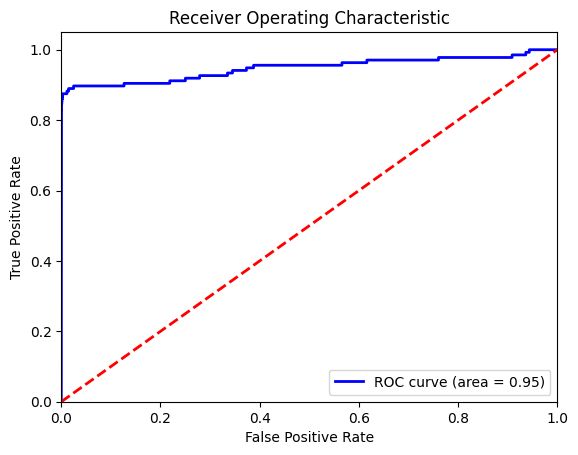

In [29]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



Conclusion:
1. From the confusion matrix, 
True Negatives (TN): 85288
False Positives (FP): 19  
False Negatives (FN): 29 
True Positives (TP): 107 
The model correctly classified 85288 transactions as non-fraudulent (i.e True Negatives).
It incorrectly classified 19 non-fraudulent transactions as fraudulent (i.e False Positives).
It incorrectly classified 29 fraudulent transactions as non-fraudulent (i.e False Negatives).
It correctly classified 107 transactions as fraudulent (i.e True Positives).
2.The ROC AUC score of 0.948 indicates that the model has a good ability to distinguish between classes, with a higher score closer to 1 representing better performance.
3.The F1 score is also high, with a score of 0.82 for class 1 (i.e fraudulent transactions). This shows that the model achieves a good balance between precision and recall for detecting fraudulent transactions.